In [1]:
__author__ = 'Kayli Glidic'

# Import Library

In [3]:
#import the spectroscopic module from the tshirt pipeline
from tshirt.pipeline import spec_pipeline

#import the RECTE charge correction functions
import Charge_Correction_Functions
from Charge_Correction_Functions import RECTE,RECTEMulti,calculate_correction_fast, charge_correction

#import basic plotting libraries/set plot settings
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
output_notebook()

#import yaml to read in the parameter file
import yaml

#Basic imports
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time
from copy import deepcopy
import time
from multiprocessing import Pool

#modeling transit/eclipse light curves
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import batman
import corner
import emcee


#to fix errors
import pdb

#to correct for time differences
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation


Loading BokehJS ...

# Batch Processing the Spectroscopic Data on CoRoT-1 b

In [4]:
#read in yaml batch parameter file on CoRoT-1 b 
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)

bparamfile

{'procFiles': ['/fenrirdata1/es_tso/hst/visit01/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit02/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit03/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit04/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADextens

In [5]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml') #create a batch_spec object

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


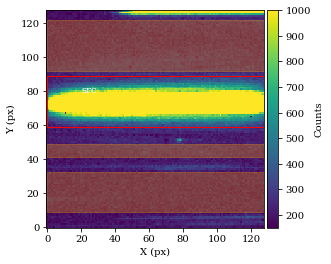

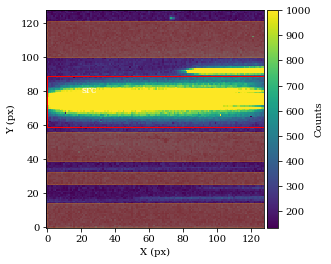

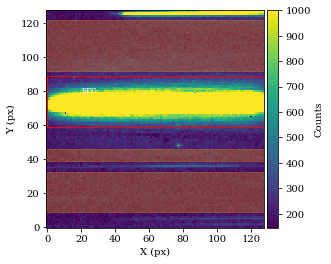

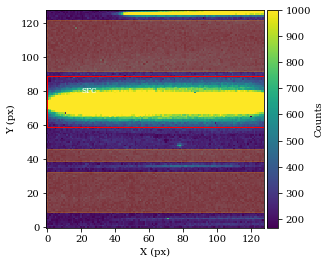

In [6]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True) #show the star choices for spectroscopy for each visit

In [7]:
bspec.batch_run('do_extraction',useMultiprocessing=True) #extract all spectroscopy

Working on do_extraction for batch CoRoT-1 corot1_visit1 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit2 


On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit3 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98


/home/kglidic/Software/tshirt/tshirt/pipeline/phot_pipeline.py:2409: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit4 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


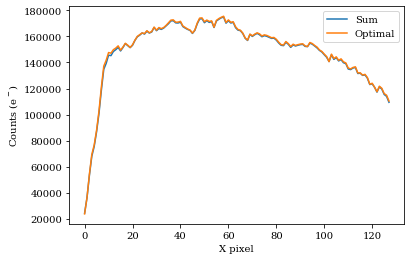

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


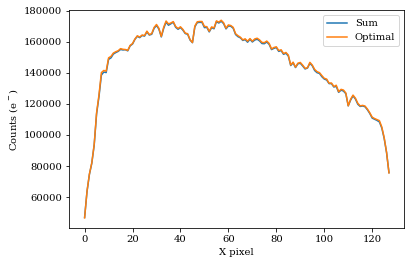

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


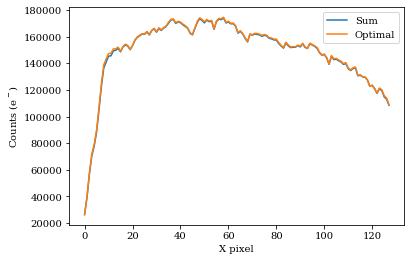

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


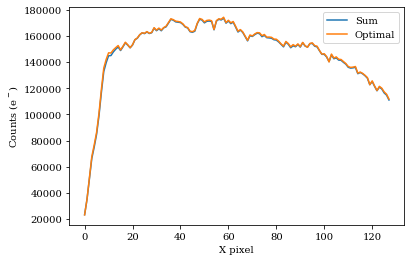

In [8]:
bspec.batch_run('plot_one_spec') #plot the spectrum of the source for each visit

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


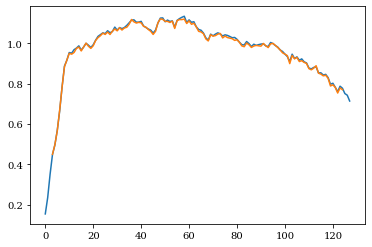

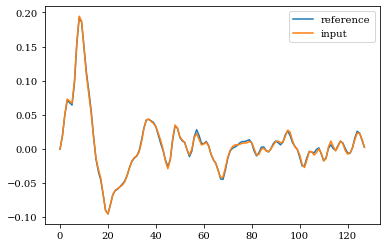

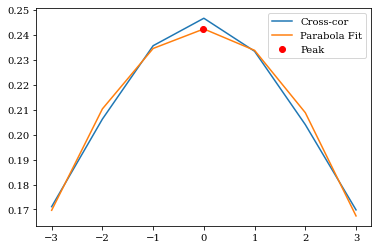

Shift = -0.023030966132883024, or index -0.023030966132882972


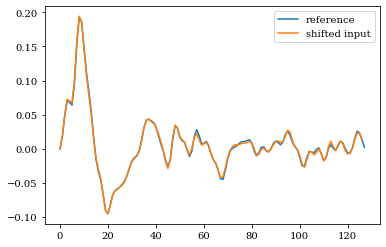

> /home/kglidic/Software/tshirt/tshirt/pipeline/spec_pipeline.py(1163)align_spec()
-> align2D[imgInd,:] = analysis.roll_pad(data2D[imgInd,:],offsetInd * self.param['specShiftMultiplier'])
(Pdb) q


BdbQuit: 

In [9]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=True) #Align all spectra and show the diagnostics of the alignment process

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


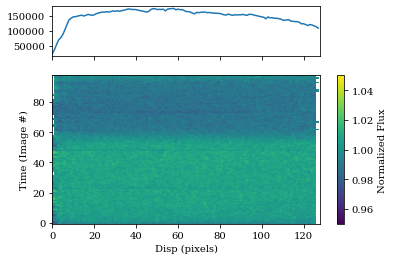

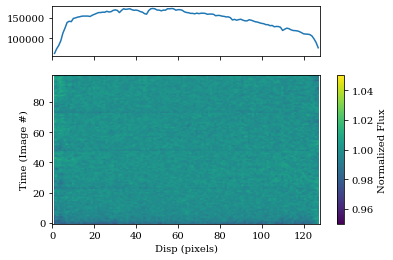

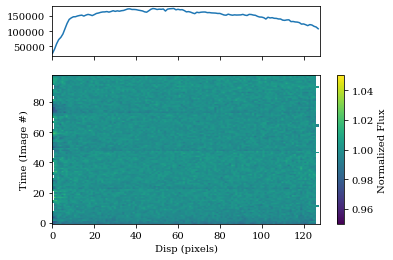

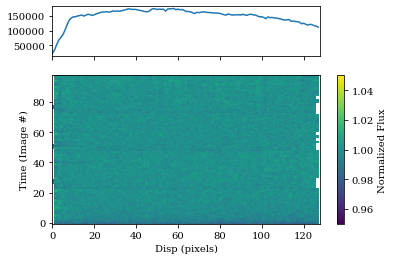

In [10]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True) #plot the dynamic spectrum for each visit

Working on make_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on make_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on make_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on make_wavebin_series for batch CoRoT-1 corot1_visit4 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


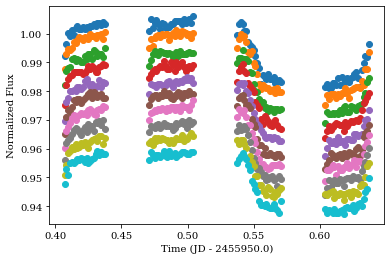

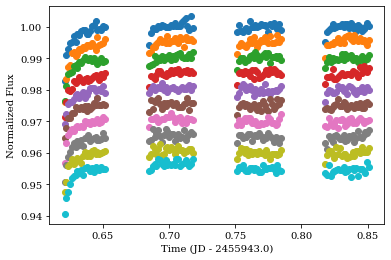

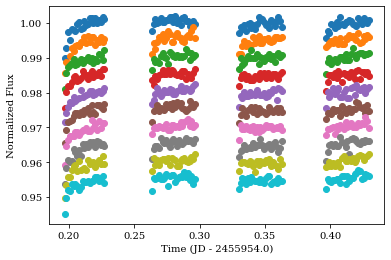

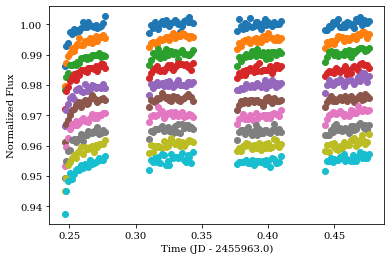

In [15]:
#Bin the wavelengths together and generate a time series from the aligned dynamic spectrum (`make_wavebin_series`)
#Plot a normalized lightcurve for wavelength-binned data one wavelength at a time with an offset between the lightcurves (`plot_wavebin_series`)

bspec.batch_run('make_wavebin_series',align=True,dispIndices=[10,118],recalculate=True,nbins=10) #Set dispersion indices based on alignment step above in `plot_dynamic_spec`.
bspec.batch_run('plot_wavebin_series', nbins=10, interactive=False,savePlot=False)

# Testing RECTE

In [11]:
#read in previously saved result files for each CoRoT-1 b visit
corot1_visit1_results = pd.read_csv('CSV_Visit_Files/corot1_visit1_results.csv')
corot1_visit2_results = pd.read_csv('CSV_Visit_Files/corot1_visit2_results.csv')
corot1_visit3_results = pd.read_csv('CSV_Visit_Files/corot1_visit3_results.csv')
corot1_visit4_results = pd.read_csv('CSV_Visit_Files/corot1_visit4_results.csv')

#read in previously save median fit files for each CoRoT-1 b visit
median_image_v1 = fits.getdata('Median_Images/corot1_visit1_median_image.fits')
median_image_v2 = fits.getdata('Median_Images/corot1_visit2_median_image.fits')
median_image_v3 = fits.getdata('Median_Images/corot1_visit3_median_image.fits')
median_image_v4 = fits.getdata('Median_Images/corot1_visit4_median_image.fits')

### CoRoT-1 b Visit 1 (Primary Transit)

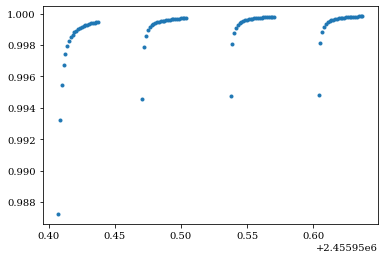

In [12]:
spec_v1 = bspec.return_spec_obj(ind=0) #Return a spectrometry object for visit 1 so other methods and attributes can be explored

#Calculate the RECTE ramp correction on the flux data 
ramps_v1=calculate_correction_fast(corot1_visit1_results['Time'].values,corot1_visit1_results['Exp Time'][0],median_image_v1,xList=np.arange(0, 128))

plt.plot(corot1_visit1_results['Time'].values, ramps_v1[30,:], '.') #Plot the ramp profile

correcteddata_v1, new_spec_v1 = charge_correction(spec_v1,ramps_v1) #Return the ramp corrected flux data as well as a corresponding spectrometry object `new_spec_v1`

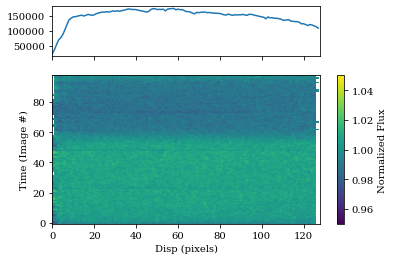

In [13]:
#Checking the original dynamic spectrum with automatic alignment of the spectra
spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

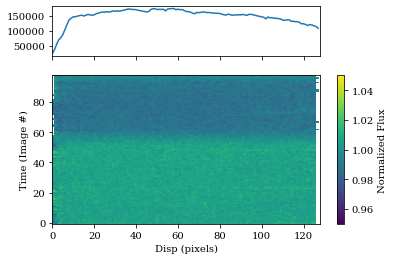

In [14]:
#Checking the new dynamic spectrum (with the ramp corrected flux data) with automatic alignment of the spectra
new_spec_v1.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

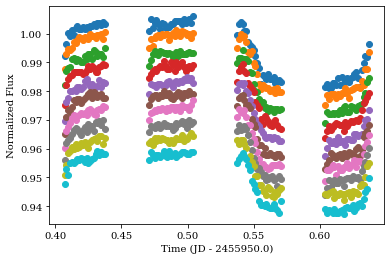

In [15]:
#Plot the original (not ramp corrected) light curve
spec_v1.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
spec_v1.plot_wavebin_series(savePlot=False) #plot the wavebin series

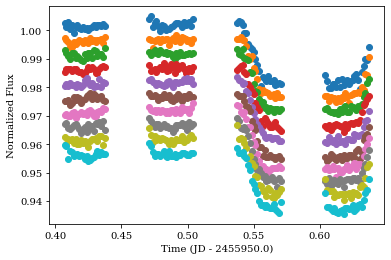

In [16]:
#Plot the new (ramp corrected) light curve
new_spec_v1.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
new_spec_v1.plot_wavebin_series(savePlot=False) #plot the wavebin series

### CoRoT-1 b Visit 2 (Secondary Eclipse)

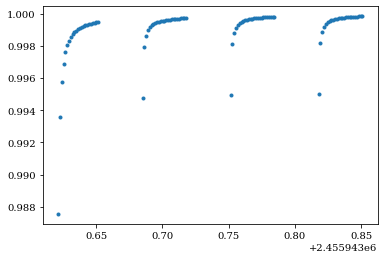

In [17]:
spec_v2 = bspec.return_spec_obj(ind=1) #Return a spectrometry object for visit 2 so other methods and attributes can be explored

#Calculate the RECTE ramp correction on the flux data
ramps_v2=calculate_correction_fast(corot1_visit2_results['Time'].values,corot1_visit2_results['Exp Time'][0],median_image_v2,xList=np.arange(0, 128))

plt.plot(corot1_visit2_results['Time'].values, ramps_v2[30,:], '.') #Plot the ramp profile

correcteddata_v2, new_spec_v2 = charge_correction(spec_v2,ramps_v2) #Return the ramp corrected flux data as well as a corresponding spectrometry object `new_spec_v2`

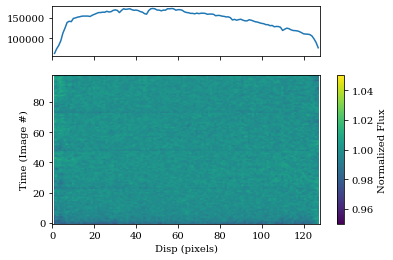

In [18]:
#Checking the original dynamic spectrum with automatic alignment of the spectra
spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

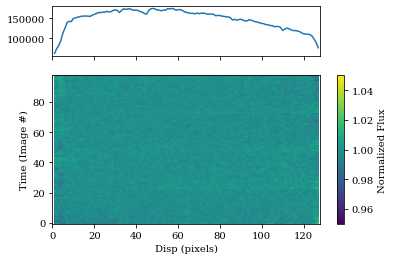

In [19]:
#Checking the new dynamic spectrum (with the ramp corrected flux data) with automatic alignment of the spectra
new_spec_v2.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

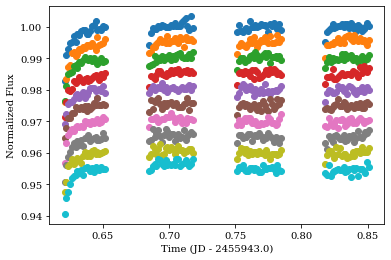

In [20]:
#Plot the original (not ramp corrected) light curve
spec_v2.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
spec_v2.plot_wavebin_series(savePlot=False) #Plot the wavebin series

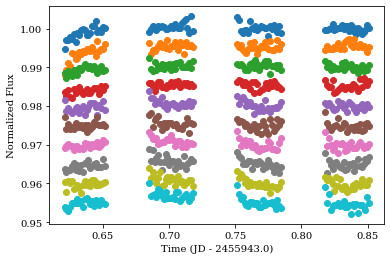

In [21]:
#Plot the new (ramp corrected) light curve
new_spec_v2.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
new_spec_v2.plot_wavebin_series(savePlot=False) #plot the wavebin series

### CoRoT-1 b Visit 3 (Secondary Eclipse)

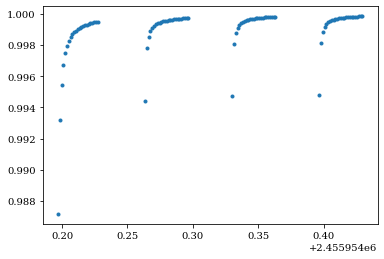

In [22]:
spec_v3 = bspec.return_spec_obj(ind=2) #Return a spectrometry object for visit 3 so other methods and attributes can be explored

#Calculate the RECTE ramp correction on the flux data
ramps_v3=calculate_correction_fast(corot1_visit3_results['Time'].values,corot1_visit3_results['Exp Time'][0],median_image_v3,xList=np.arange(0, 128))

plt.plot(corot1_visit3_results['Time'].values, ramps_v3[30,:], '.') #Plot the ramp profile

correcteddata_v3, new_spec_v3 = charge_correction(spec_v3,ramps_v3) #Return the ramp corrected flux data as well as a corresponding spectrometry object `new_spec_v3`

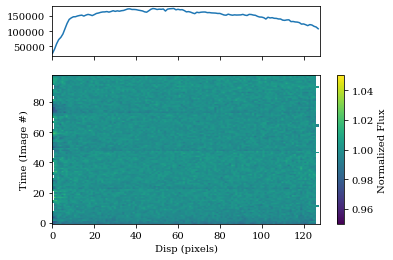

In [23]:
#Checking the original dynamic spectrum with automatic alignment of the spectra
spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

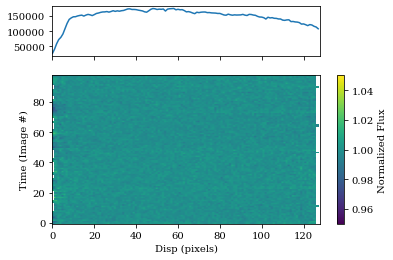

In [24]:
#Checking the new dynamic spectrum (with the ramp corrected flux data) with automatic alignment of the spectra
new_spec_v3.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

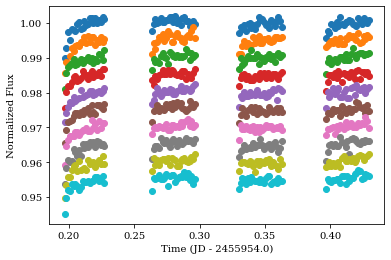

In [25]:
#Plot the original (not ramp corrected) light curve
spec_v3.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
spec_v3.plot_wavebin_series(savePlot=False) #plot the wavebin series

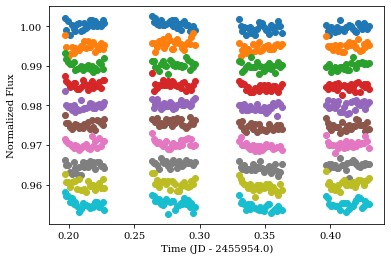

In [26]:
#Plot the new (ramp corrected) light curve
new_spec_v3.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
new_spec_v3.plot_wavebin_series(savePlot=False) #plot the wavebin series

### CoRoT-1 b Visit 4 (Secondary Eclipse)

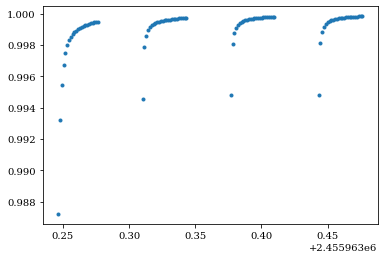

In [27]:
spec_v4 = bspec.return_spec_obj(ind=3) #Return a spectrometry object for visit4 so other methods and attributes can be explored

#Calculate the RECTE ramp correction on the flux data
ramps_v4=calculate_correction_fast(corot1_visit4_results['Time'].values,corot1_visit4_results['Exp Time'][0],median_image_v4,xList=np.arange(0, 128))

plt.plot(corot1_visit4_results['Time'].values, ramps_v4[30,:], '.') #Plot the ramp profile

correcteddata_v4, new_spec_v4 = charge_correction(spec_v4,ramps_v4) #Return the ramp corrected flux data as well as a corresponding spectrometry object `new_spec_v4`

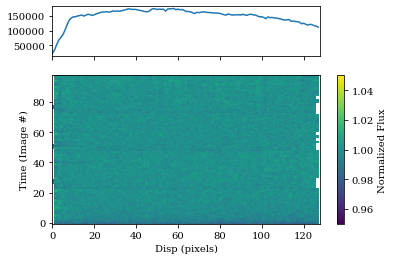

In [28]:
#Checking the original dynamic spectrum with automatic alignment of the spectra
spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

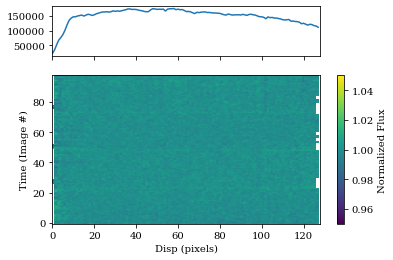

In [29]:
#Checking the new dynamic spectrum (with the ramp corrected flux data) with automatic alignment of the spectra
new_spec_v4.plot_dynamic_spec(showPlot=True,align=True,alignDiagnostics=False)

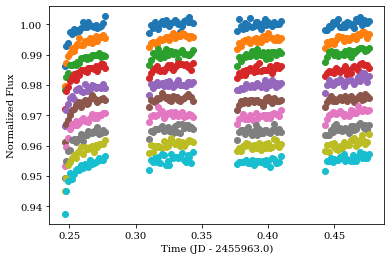

In [30]:
#Plot the original (not ramp corrected) light curve
spec_v4.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
spec_v4.plot_wavebin_series(savePlot=False) #plot the wavebin series

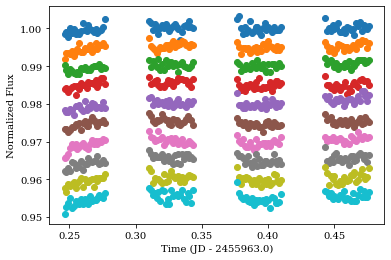

In [31]:
#Plot the new (ramp corrected) light curve
new_spec_v4.make_wavebin_series(align=True,dispIndices=[10,118],recalculate=True,nbins=10) #make the wavebin series first
new_spec_v4.plot_wavebin_series(savePlot=False) #plot the wavebin series

# Modeling Transit/Eclipses

In [32]:
#getting the values for planet radius and semi-major axis in units of stellar radii

#planet radius (in units of stellar radii)
rp =1.715 * u.Rjupiter #Bonomo et al. 2017
Rstar = 1.230 * u.Rsun #Bonomo et al. 2017
planet_radius = (rp/Rstar).si.value
#planet_radius = 0.1433 #Bean 2009

#semi-major axis (in units of stellar radii)
a = 0.02752 * u.au  #Bonomo et al. 2017
a_over_r = (a/Rstar).si.value
#a_over_r = 4.751 #Bean 2009

In [33]:
params_transit = batman.TransitParams()       #object to store transit parameters

params_transit.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_transit.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
#params_transit.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_transit.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_transit.inc =85.15 #Bonomo et al. 2017#83.88   #Bean 2009            #orbital inclination (in degrees)
params_transit.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_transit.w = 90.                                                      #longitude of periastron (in degrees)
params_transit.limb_dark = "nonlinear"                                      #limb darkening model
params_transit.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

def transit_model(x, rp, a, b):
    '''
    Models transit light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
    '''
    params_transit.rp = rp
    m = batman.TransitModel(params_transit, x)
    #Modifying the slope: Julian Date - Initial Julian Date 
    x0 = np.min(x)
    flux = m.light_curve(params_transit)*(a+b*(x-x0))
    return flux

In [34]:
#one must define the global parameters im, exptime, and xList for each visit
def transit_model_RECTE(x, rp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models transit light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
        
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dtrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    
    dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = transit_model(x,rp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified

In [35]:
params_eclipse = batman.TransitParams()       #object to store transit parameters

params_eclipse.t0 = 2454138.32807 #Mid-point(days) Bonomo et al. 2017       #time of inferior conjunction
params_eclipse.per = 1.5089682  #(days) Bonomo et al. 2017                  #orbital period
params_eclipse.rp =  planet_radius #Bonomo et al. 2017                      #planet radius (in units of stellar radii)
params_eclipse.a = a_over_r #Bonomo et al. 2017                             #semi-major axis (in units of stellar radii)
params_eclipse.inc =85.10   #Bonomo et al. 2017        #orbital inclination (in degrees)
params_eclipse.ecc = 0.     #Bonomo et al. 2017                             #eccentricity
params_eclipse.w = 90.                                                      #longitude of periastron (in degrees)
params_eclipse.limb_dark = "nonlinear"                                      #limb darkening model
params_eclipse.u = [0.5, 0.1, 0.1, -0.1]                                    #limb darkening coefficients [u1, u2, u3, u4]

#parameters for modeling eclipses 
#specify the planet-to-star flux ratio and the central eclipse time:
params_eclipse.t_secondary = params_eclipse.t0 + 0.5* 1.5089682

#adding a new parameter b for new normalization (a+b*x)
def eclipse_model(x, fp, a, b):
    '''
    Models eclipse light curve based on initial parameters
    
    Parameters
    ----------
    
    x: 
        Time in days 
        
    fp: int
        planet-to-star flux ratio
        
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    '''
    params_eclipse.fp = fp/1000000
    m = batman.TransitModel(params_eclipse, x, transittype="secondary")
    #Modifying the slope: Julian Date - Initial Julian Date 
    x0 = np.min(x)
    flux = m.light_curve(params_eclipse)*(a+b*(x-x0)) 
    return flux

In [36]:
#one must define the global parameters im, exptime, and xList for each visit
def eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models eclipse light curve based on initial parameters and RECTE corrections
    
    Parameters
    ----------
    
    x: 
        Time in days 
    fp: int
        Planet-to-flux ratio
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
    
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
     dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    flux = eclipse_model(x,fp,a,b)
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified
    

In [37]:
# if you needed to define an object spec 
#relPath = '/home/kglidic/Software/tshirt_files/tshirt/Corot1_Data/corot1_batch_file.yaml'
#specPath = os.path.join(spec_pipeline.baseDir,relPath)
#spec = spec_pipeline.batch_spec(specPath)

def barycenter_correction(self):
    t1, t2 = self.get_wavebin_series()
    head = fits.getheader(self.fileL[0])
    #print("Time from tshirt: {}".format(t1['Time'][0]))
    
    expStartJD = head['EXPSTART'] + 2400000.5
    #print("Time from EXPSTART keyword {}".format(expStartJD))
    
    t1 = Time(t1['Time'][0],format='jd')
    coord = SkyCoord('06 48 19.1724141241 -03 06 07.710423478',unit=(u.hourangle,u.deg))
    loc = EarthLocation.of_site('keck')
    diff = t1.light_travel_time(coord,location=loc)
    #print('Travel Time from Keck to Barycenter= {} min'.format((diff / u.min).si))
    
    return (diff / u.day).si


In [38]:
def optimize_batman_model(self,model,nbins=10,showPlot=False):
    """
    Optimizes batman model light curves (for transits and/or secondary eclipses) based on initial parameters. 
    This function does not consider RECTE charge trapping parameters. 
    This function utilizies the scipy.optimize.curve_fit model fitting approach. 
    
    Parameters
    ----------
    
    self: keyword
        Spectrometry Object
    
    model: function
        A function that models either transits or secondary eclipses. Must be previously defined.
    
    nbins: int
        The number of wavelength bins. The Default is "nbins=10".
        
    showPlot: bool
        Make the plot visible? The Default is "False"
        
    """
   
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Define the columns of the raw flux data (raw_results) and the raw flux error data (raw_results_errors) tables.  
    columns = raw_results.columns
    columns_errors = raw_results_errors.columns
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis data as well as the corresponding errors. Return as a Numpy representation of the data.
    ydata = raw_results.columns[1:].values #Skip over the time column
    ydata_errors = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction

    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
    
    #Define empty lists to store scipy.optimize.curve_fit results.
    popt_list=[] #Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
    pcov_list=[] #List of one standard deviation errors on the parameters. 
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model):
        text = 'fit: pr=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [0.13,1.0,0.0] #each guess value in the list corresponds to the parameter order in text
    elif(model ==eclipse_model):
        text = 'fit: fp=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [500,1.0,0.0] #each guess value in the list corresponds to the parameter order in text
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    for columns, columns_errors, wavelength in zip(ydata,ydata_errors,wavelength_list):
        
        #Trim the data used in the model. Exclude the first orbit in each visit since RECTE is not optimized here and the ramp profile is still prevalent. 
        #Specific to CoRoT-1 b data, first orbit ends at data point 23. This will change depending on data. 
        xdata_trimmed = xdata[23:]  
        ydata_trimmed = raw_results[columns][23:]
        ydata_error_trimmed = raw_results_errors[columns_errors][23:].tolist() #Convert error data to a list in order to use in scipy.optimize.curve_fit 

        #Call and run scipy.optimize.curve_fit. 
        #Returns an array of optimal values for the parameters (popt) and an array for the the estimated covariance of popt (pcov).
        popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed,sigma=ydata_error_trimmed,p0=p0)
        
        #Append these returned arrays into the previously defined empty lists.
        popt_list.append(popt)
        pcov_list.append(np.sqrt(np.diag(pcov))) #To compute one standard deviation errors on the parameters
        
        #Light Curve Plotting Options
        if(showPlot==True):
            
            fig, ax =plt.subplots() #Define the figure space
            
            #Plot all orbitial data but, the model excludes the first orbit.
            ax.plot(xdata_trimmed, model(xdata_trimmed, *popt), 'r-',
                    label=text % tuple(popt)) #The *popt will grab the optimized parameters required for the model. 

            ax.plot(raw_results['Time'], raw_results[columns],'o') #Plot the time data vs. initial flux data
            
            #Axis labels
            ax.set_xlabel('Time (JD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Wavelength ='+str(wavelength))

    return popt_list,pcov_list

In [43]:
def optimize_batman_model_RECTE(self,model,nbins=10,showPlot=False,recalculate=False):
    
    """
    Optimizes batman model light curves (for transits and/or secondary eclipses) based on initial parameters. 
    This function does consider RECTE charge trapping parameters. 
    This function utilizies the scipy.optimize.curve_fit model fitting approach. 
    
    Parameters
    ----------
    
    self: keyword
        Spectrometry Object
    
    model: function
        A function that models either transits or secondary eclipses that encorporate RECTE charge trapping parameters . 
        Must be previously defined.
    
    nbins: int
        The number of wavelength bins. The Default is "nbins=10".
        
    showPlot: bool
        Make the plot visible? The Default is "False"
        
    recalculate: bool
        Recalculate the model optimizations? The Default is "False"
        
    """
    
    global xList #Both applicable models for this function require an xList (Dispersion Range) parameter to be defined outside of the function itself. 
    
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis columns as well as the corresponding errors.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction
    
    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
    
    #Defining the global xList parameter needed in the model functions with RECTE
    xList_all = [] #empty list to store each wavlengths dispersion indices.
    #Loop over each wavelength's bin index. The dispersion indices will be different for each wavelength bin. 
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind] #Start of the dispersion range
        Disp_end = table_noise['Disp End'][ind] #End of the dispersion range
        Disp_xList = np.arange(Disp_st, Disp_end,1) #Return Numpy array of evenly spaced values within a given interval. 
        xList_all.append(Disp_xList) #Append Numpy array to the empty list to late be iterated over.
        
    #Define empty lists to store scipy.optimize.curve_fit results.
    popt_list=[] #Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
    pcov_list=[] #List of one standard deviation errors on the parameters. 
    
    #Plotting options
    if(showPlot==True):
        
        fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(20,10),sharey=False) #Set up the figure space
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model_RECTE):
        text = 'fit: pr=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [0.13,1.0,0.0,200,200,20,1] #each guess value in the list corresponds to the parameter order in text
    elif(model ==eclipse_model_RECTE):
        text = 'fit: fp=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [500,1.0,0.0,200,200,20,1] #each guess value in the list corresponds to the parameter order in text
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Establsih a color map index, to be iterated over, based on the number of wavebins defined. 
    color_idx_range = np.linspace(0.3, 0.8, nbins)

    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    #Each wavelength will have an associated color (determined by the color index), bin number, and dispersion range.  
    for columns,columns_errors,disp_range,bin_number,color_idx,wavelength in zip(ydata_columns,ydata_errors_columns,xList_all,np.arange(nbins),color_idx_range,wavelength_list):
        
        xList = disp_range #The xList will correspond to the dispersion range. 

        ydata = raw_results[columns] #Return as a Numpy representation of the data.
        yerr = raw_results_errors[columns_errors]
        ydata_error_list = yerr.tolist() #Convert error data to a list in order to use in scipy.optimize.curve_fit 
        
        #This line is used to save results to a specific folder in order to streamline previously run data. (Can be altered)
        results_file = 'opt_result_tables/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

        #If the previously defined results_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(results_file) == True ) and (recalculate == False):
            dat = ascii.read(results_file)
            popt = np.array(dat['popt']) #read in the optimized parameter values
            pcov_diag = np.array(dat['pcov_diag']) #read in the one standard deviation errors on the parameters.
        
        #If the previously defined results_file does not exsit or if the recalculation parameter is set to True, call and run scipy.optimize.curve_fit 
        else:
            bounds =([-np.inf,0,-np.inf,0,0,0,0],[np.inf,np.inf,np.inf,500,500,200,200]) #set upper and lower limits for all parameters. Most importantly set the RECTE parameters limits to be within reason. 
            #Returns an array of optimal values for the parameters (popt) and an array for the the estimated covariance of popt (pcov).
            popt, pcov = curve_fit(model,xdata,ydata,sigma=ydata_error_list,p0=p0,bounds=bounds)
            pcov_diag = np.sqrt(np.diag(pcov)) #To compute one standard deviation errors on the parameters
            #Create a table for these results and save them to the results_file defined previously. 
            dat = Table()
            dat['popt'] = popt
            dat['pcov_diag'] = pcov_diag
            dat.write(results_file)

        #Append these returned arrays into the previously defined empty lists.
        popt_list.append(popt)
        pcov_list.append(pcov_diag)
        
        #Plotting Options
        if(showPlot==True):

            #This line is used to save light curve modeling results to a specific folder in order to streamline previously run data. (Can be altered)
            lightcurve_file = 'model_lightcurves/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

            #If the previously defined lightcurve_file exists and the recalculation parameter is set to False, read it in. 
            if (os.path.exists(lightcurve_file) == True ) and (recalculate == False):
                dat = ascii.read(lightcurve_file)
                Time = np.array(dat['Time'])

                #Saftey check If the Time read does not match the xdata (time) within a tolerance raise an error. 
                if np.allclose(Time,xdata,rtol=1e-15) == False:
                    raise Exception("Times don't match")
                ymodel = np.array(dat['ymodel'])
                ramp_model = np.array(dat['ramp_model'])
                
            #If the previously defined lightcurve_file does not exsit or if the recalculation parameter is set to True, call and run the ramp model function (charge_correction_fast). 
            else: 
                ymodel = model(xdata, *popt) #define the model based on optimized parameters (*popt)
                ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=popt[3], dTrap_s=[popt[4]], trap_pop_f=popt[5], dTrap_f=[popt[6]]) #calculate the ramp in the data based on optimized parameters (popt)
                ramp_model = np.mean(ramp,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
                #Create a table for these results and save them to the lightcurve_file defined previously. 
                dat = Table()
                dat['Time'] = xdata
                dat['ymodel'] = ymodel
                dat['ramp_model'] = ramp_model
                dat.write(lightcurve_file)
                
            #Plots
            offset = 0.007 #set an offset between each wavelegnth's light curve.
            
            #The first plot (ax) is the original light curves with the models accounting for RECTE charge trapping parameters overlaid. 
            ax.plot(xdata, ymodel-bin_number*offset, 'r-',
                    label=text % tuple(popt)) #models accounting for RECTE parameters
            ax.plot(xdata, ydata-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),alpha=0.8) #original data
            
            #plot labels
            ax.set_xlabel('Time (BJD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('CoRoT-1 b Light Curves')
            ax.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(ydata)-bin_number*offset+0.002),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
            
            
            #The second plot (ax2) is the original light curves with the ramp_model systematics divided out along with the models accounting for RECTE charge trapping parameters with the ramp_model divided out divided and overlaid. 
            ax2.plot(xdata, (ymodel/ramp_model)-bin_number*offset, 'r-',
                    label=text % tuple(popt)) #models with the ramp_model divided out accouting for the RECTE parameters 
            ax2.plot(xdata,(ydata/ramp_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),alpha=0.8) #original data with the ramp model divided out. 

            #Plot labels
            ax2.set_xlabel('Time (BJD)')
            ax2.set_title('CoRoT-1 b Light Curves/n Ramp Systematic Removed')
            ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(ydata)-bin_number*offset+0.005),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
        

            #The third plot (ax3) is the residuals of the original data from the model
            ax3.plot(xdata, (ydata-ymodel)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx))
            
            #Plot Labels
            ax3.set_ylabel('Residuals')
            ax3.set_xlabel('Time (BJD)')
            ax3.set_title('CoRoT-1 b Model Residuals')
            #ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(raw_results[columns])-bin_number*offset+0.005),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
        
        #save figure options
        #figure_name='saved_figures/new_Corot1_{}_lightcurves.jpeg'.format(self.param['nightName'])   
        #fig.savefig(figure_name)

    return popt_list,pcov_list

## Transit (Visit 1)

Runtime of the program is 0.5291776657104492


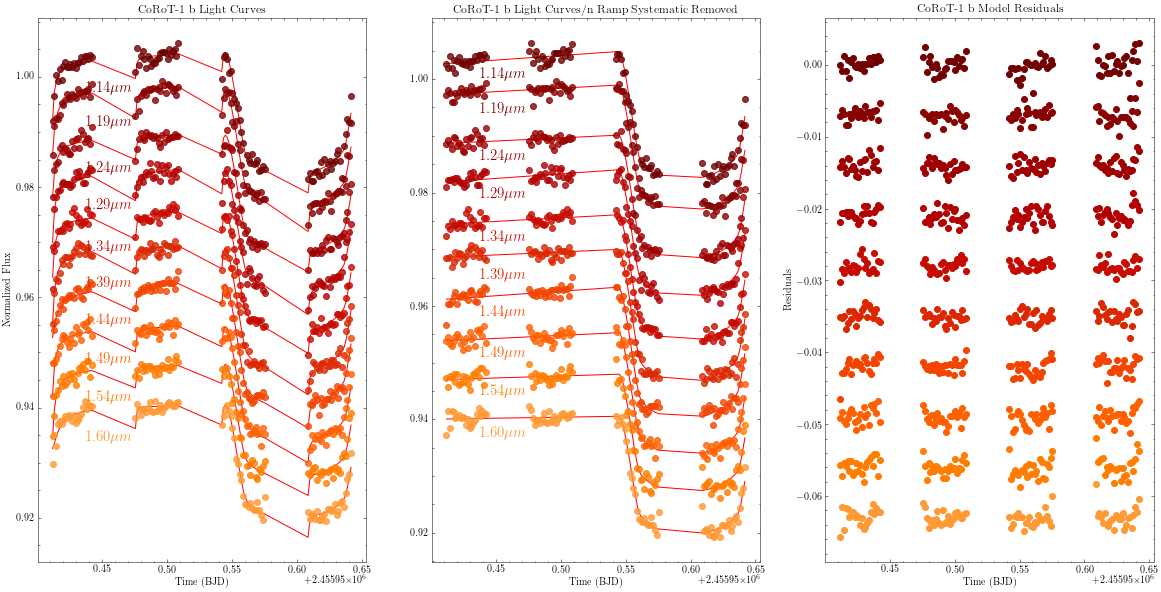

In [44]:
import time
start = time.time()

#optimizing/plotting visit 1 wavebin channels with RECTE
info_v1 = corot1_visit1_results
exptime = info_v1['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit1_median_image.fits')

v1_wavebin_channels = optimize_batman_model_RECTE(spec_v1,transit_model_RECTE,nbins=10,showPlot=True)
end = time.time()

print(f"Runtime of the program is {end - start}")

In [45]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


## Secondary Eclipses (Visit 2, 3, & 4)

### Visit 2

Runtime of the program is 0.5051271915435791


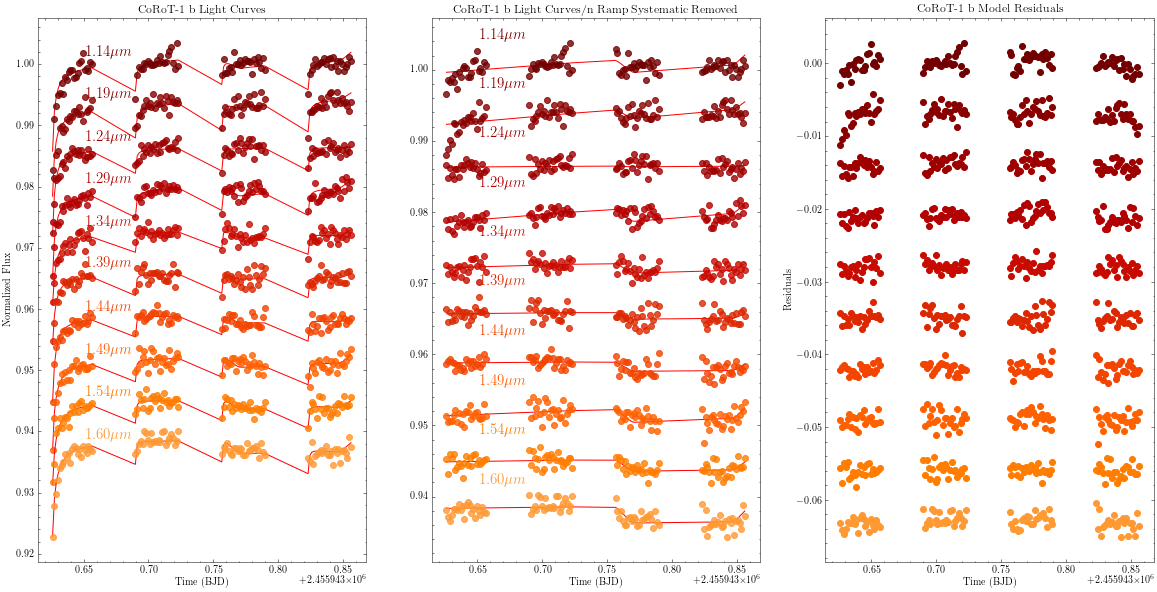

In [46]:
import time
start = time.time()

#optimizing/plotting visit 2 wavebin channels with RECTE
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit2_median_image.fits')

v2_wavebin_channels = optimize_batman_model_RECTE(spec_v2,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [47]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


###  Visit 3

Runtime of the program is 0.4570810794830322


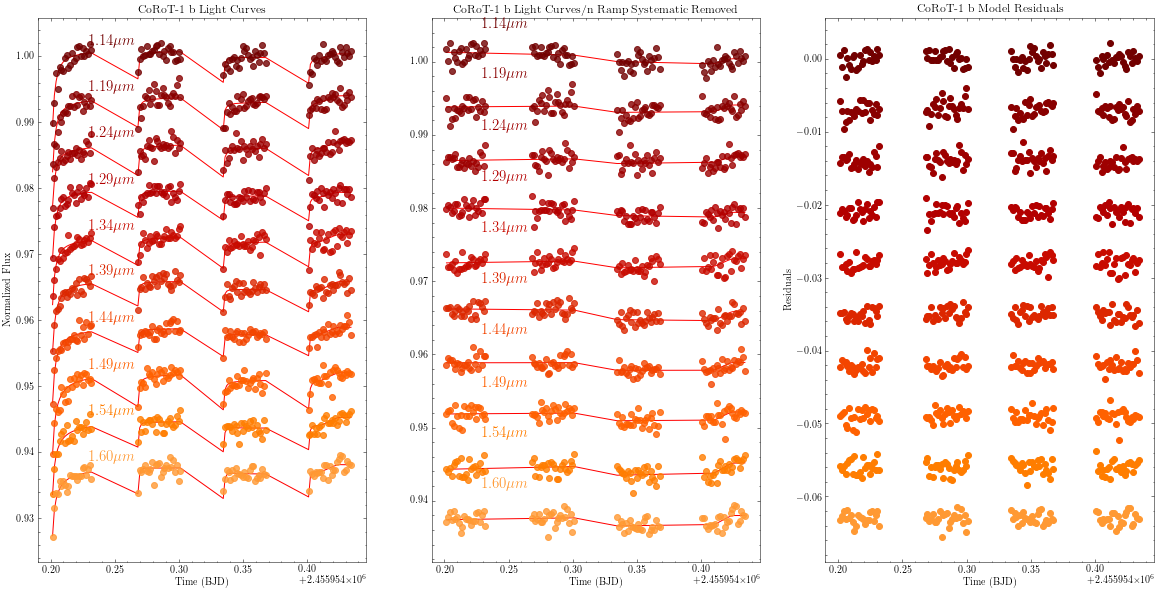

In [48]:
start = time.time()

#optimizing/plotting visit 3 wavebin channels with RECTE
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit3_median_image.fits')

v3_wavebin_channels = optimize_batman_model_RECTE(spec_v3,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [49]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


###  Visit 4

Runtime of the program is 0.5059168338775635


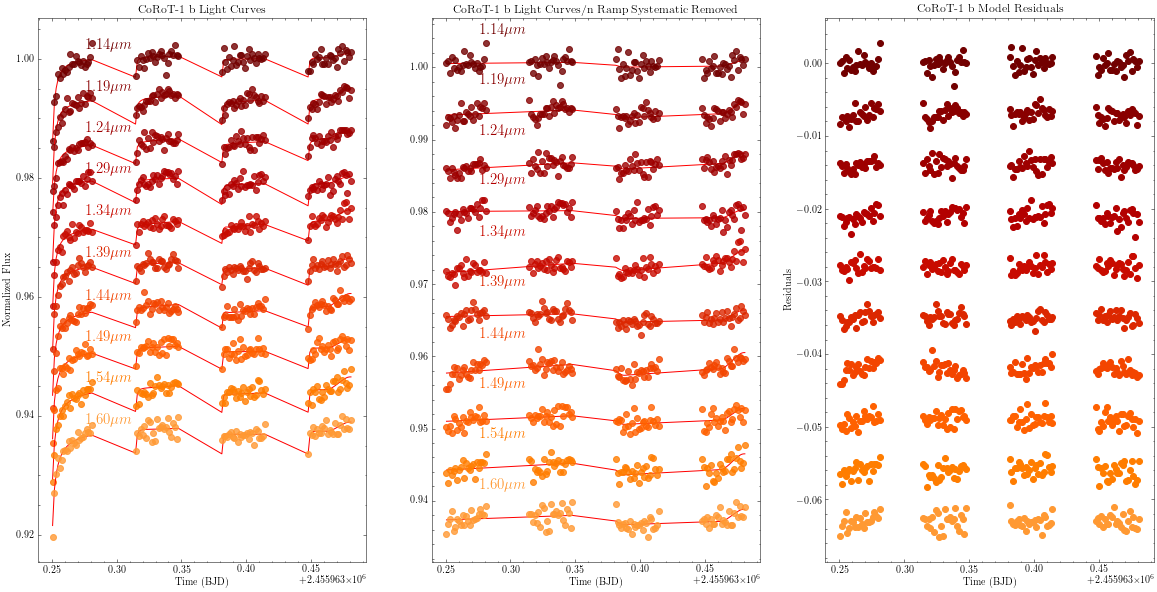

In [50]:
start = time.time()

#optimizing/plotting visit 4 wavebin channels with RECTE
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit4_median_image.fits')

v4_wavebin_channels = optimize_batman_model_RECTE(spec_v4,eclipse_model_RECTE,nbins=10,showPlot=True)

end = time.time()
print(f"Runtime of the program is {end - start}")

In [51]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


# MCMC Functions

In [52]:
#Define the log liklihood function; a natural logarithm of the liklihood
#Measures the goodness of fit of a statistical model to a sample of data for given values of the unknown parameters.
#Procedure for obtaining maximum likelihood estimation (the parameter values for the model such that they maximize the likelihood of this model actually being observed) is done in the function `MCMC`. 
def log_likelihood(theta, x, y, yerr):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #the unknown parameters, the blueprint for the model
    model = eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f) #the model 
    return -0.5 * np.sum((y - model) ** 2 / yerr ** 2)

In [55]:
#Define prior knowledge of the parameters by setting bounds to restrict some parameters
def log_prior(theta):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #parameters
    
    #set bounds for the RECTE charge trapping parameters
    if 0.0 < trap_pop_s < 500 and 0.0 < dtrap_s < 500 and 0.0 < trap_pop_f < 200 and 0.0 < dtrap_f < 200 :
        return 0.0
    return -np.inf

In [56]:
#Set up the full log -probability function; combine the log prior and the log likelyhood 
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if np.isfinite(lp):
        return lp + log_likelihood(theta, x, y, yerr)
    return -np.inf

In [71]:
def MCMC(self,model,iterations,nbins=10,recalculate=False,showPlot=False,LCPlot=False):
    
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis data as well as the corresponding errors. Return as a Numpy representation of the data.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction

    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')    
    
    #Define a LIST of initial guess error values for each parameter by calling the `optimize_batman_model_RECTE` function. This can also be a list of arrays, each array dedicated to a wavebin. 
    initial_error_list = optimize_batman_model_RECTE(self,model,nbins=nbins)[1]
    error_2D = np.array(initial_error_list) #Make the error list into an array
    bad_points = np.isfinite(error_2D) == False #Define any non-finite values in the array as bad points. 
    error_2D[bad_points] = np.nan #Replace bad points as nan values
    avg_error=np.nanmean(error_2D, axis=0) #average over each row. If only one list in the array,average will return the initial list.   
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model_RECTE):
        labels = ["pr", "a", "b","trap_pop_s","dtrap_s", "trap_pop_f", "dtrap_f"]
        p0 = [0.13,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
        
    elif(model==eclipse_model_RECTE):
        labels = ["fp", "a", "b","trap_pop_s","dtrap_s","trap_pop_f", "dtrap_f"]
        p0 = [500,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
    
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Define empty lists to store percentile computations
    q50_array =[] #50th, median
    q16_array =[] #16th, -1 std
    q84_array =[] #84th, +1 std
    
    #Establsih a color map index, to be iterated over, based on the number of wavebins defined. 
    color_idx_range = np.linspace(0.3, 0.8, nbins)
    
    #Set up plotting options for the Light Curve
    if (LCPlot==True):
        fig, (ax2) = plt.subplots(figsize=(20,20)) #Set up the figure space


    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    #Each wavelength will have an associated color (determined by the color index) and bin number.  
    for columns,columns_errors,bin_number,color_idx, wavelength in zip(ydata_columns,ydata_errors_columns,np.arange(nbins),color_idx_range,wavelength_list):
        
        ydata = raw_results[columns].values # Return as a Numpy representation of the data.
        ydata_errors = raw_results_errors[columns_errors].values
        
        start_MLE = time.time() #Start of the internal timer for Maximum likelihood estimate

        #This line is used to save results to a specific folder in order to streamline previously run data. (Can be altered)
        result_file = 'opt_result_tables/MCMC20000_soln.x_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined results_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(result_file) == True) and (recalculate == False):
            dat = ascii.read(result_file)
            soln_xarray = dat['soln'] #read in the solution array,the numerical optimums of this likelihood function, the maximum liklihood estimates
            
        #If the previously defined results_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            #Create a table for these solution array and save them to the results_file defined previously. 
            dat = Table() 
            #run MCMC
            nll = lambda *args: -log_probability(*args) #Define a small anonymous function (nll using lambda) that take all arguments required of the log_probability function. Define the expession to be exectured as the log_probability function. 
            initial = np.array([p0[0],p0[1], p0[2], p0[3],p0[4],p0[5],p0[6]]) #Define the initial guess values
            soln = minimize(nll, initial, args=(xdata, ydata, ydata_errors)) #Run the scipy.optimize.minimize function to return optimization results.
            soln_xarray = soln.x #Grab and save the solution array. 
            dat['soln'] = soln['x']
            dat.write(result_file)
            
        end_MLE = time.time() #End of the internal timer for Maximum likelihood estimate
        MLE_time= end_MLE-start_MLE
        print("Maximum Likelihood Estimation Took {0:.1f} Seconds".format(MLE_time))


        nwalkers = 14 #Define the number of walkers in the ensemble (can vary)
        ndim = 7 #Define the number of parameters in model

        pos = np.empty([nwalkers,ndim]) # Define the shape of the initial state or position vector.
        
        #Loop through each element of each array simultaneously (The initial guess error value of each parameter, the MLE value for each parameter, and a range where the index of the returned array pertains to each parameter.  
        for i, j, k in zip(avg_error,soln_xarray,np.arange(ndim)):
            if k == 3 or k == 4:
                pos[:,k] = np.random.rand(nwalkers) * 500 #Confine the trap_pop_s and dtrap_s populations to a non-negative space with a limit at 500 (reasonable trap population bounds)
            elif k ==5 or k==6:
                pos[:,k] = np.random.rand(nwalkers) * 200 #Confine the trap_pop_f and dtrap_f populations to a non-negative space with a limit at 200 (reasonable trap population bounds)
            else: 
                pos[:,k] = j + i* np.random.randn(nwalkers)*10  #All other parameters initialized around the maximum likelihood results           
        
        #This line is used to save results to a specific folder in order to streamline previously run MCMC analysis. (Can be altered)
        MCMC_file = '/fenrirdata1/kg_data/sample_chains20000/MCMC20000_visits_{}_wavelength_ind_{}_nbins{}.h5'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined MCMC_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(MCMC_file) == True) and (recalculate == False):
            sampler = emcee.backends.HDFBackend(MCMC_file, read_only=True) #A reader for existing samplings
            check_step_size = sampler.get_chain() #Check the MCMC step size

            #If the step size is less than the defined iterations in the function continue MCMC analysis
            if (check_step_size.shape[0] < iterations):
                print("Found "+str(check_step_size.shape[0])+" steps, running "+ str(iterations - check_step_size.shape[0])+ " more steps.")
                
                with Pool(16) as pool: #preform with multiprocessing
                    new_backend = emcee.backends.HDFBackend(MCMC_file) #In order to save additional emcee runs, rename the backend object
                    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors), backend=new_backend, pool=pool) #instantiating an EnsembleSampler for emcee
                    
                    #Iterate sampler for nsteps iterations and return the result. 
                    #Set initial state or position vector to NONE in order to resume where run_mcmc last was executed from. Set store=True to save runs. 
                    sampler.run_mcmc(None, iterations-check_step_size.shape[0], progress=True, store =True) 

        #If the previously defined MCMC_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            with Pool(16) as pool: #preform with multiprocessing
                
                start_MCMC = time.time() #Start of the internal timer for MCMC analysis

                backend = emcee.backends.HDFBackend(MCMC_file) #Create a backend that stores the chain in memory

                sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors),backend=backend,pool=pool) #instantiating an EnsembleSampler for emcee
                
                #Iterate sampler for nsteps iterations and return the result.Define initial state or position vector and set store=True to save runs. 
                sampler.run_mcmc(pos, iterations, progress=True,store=True);
                
                end_MCMC = time.time() #End of the internal timer for MCMC analysis
                MCMC_time = end_MCMC - start_MCMC
            print("MCMC Multiprocessing Analysis Took {0:.1f} Seconds".format(MCMC_time))
        
        tau = sampler.get_autocorr_time(quiet=True) #Compute an estimate of the autocorrelation time for each parameter. The parameter quiet=True will return a warning rather than stop the code. 

        burnin = int(2 * np.max(tau)) #Define the "burn-in" steps for each parameter based on its autocorrelation time. To be discarded.
        thin = int(0.5 * np.min(tau)) #Define how to thin the sampler chain. Take only every "thin" steps from the chain. 
        #print("The Autocorrelation Time is: {0}".format(tau))
        #print("The Burn-In Steps: {0}".format(burnin))
        #print("Thin the Sampler Chain by: {0}".format(thin))
        
        flat_samples = sampler.get_chain(discard=burnin,thin=thin,flat=True) # Flatten the chain so that we have a flat list of samples
        
        #Define the 50th Percentile for each parameter; the mean 
        q50 = np.percentile(flat_samples,50,axis=0)
        q50_array.append(q50)
        
        #Define the 16th Percentile for each parameter; -1 std
        q16 = np.percentile(flat_samples,16,axis=0)
        q16_array.append(q50-q16) #Define the lower unccertainty limit
        
        #Define the 84th Percentile for each parameter; +1 std
        q84 = np.percentile(flat_samples,84,axis=0)
        q84_array.append(q84-q50) #Define the upper unccertainty limit

        #Plotting options for the parameter distributions
        if(showPlot==True):
            fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True) #Set up the figure space
            
            
            samples = sampler.get_chain() #Get the stored chain of MCMC samples

            #Loop through each parameter
            for k in range(ndim):
                ax = axes[k]
                ax.plot(samples[:, :, k], "k", alpha=0.3) #Plot each parameter distribution 
                ax.set_xlim(0, len(samples))
                ax.set_ylabel(labels[k])
                #ax.yaxis.set_label_coords(-0.1, 0.5)
            axes[-1].set_xlabel("Step Number");
            
            corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],show_titles=True); #generate a corner plot for each wavebin
        
        #Light Curve Plotting
        if(LCPlot==True):
            
            offset = 0.007 #Define an offset between wavebins
        
            inds = np.random.randint(len(flat_samples), size=10) #Define, at random number, indices of the flat sample to generate models 
            
            #Loop through these indices
            for ind in inds:
                sample = flat_samples[ind] #Pull the parameter values at this index as a sample
                ymodel=model(xdata, *sample) #Plug in these sample values into the model function
                
                ax2.plot(xdata, ymodel-bin_number*offset, color=plt.cm.gist_heat(color_idx), alpha=0.1) #Plot the family of models
            
            ax2.errorbar(xdata, ydata-bin_number*offset, yerr=ydata_errors, color=plt.cm.gist_heat(color_idx), fmt="o", capsize=5) #Plot the light curves with error bars for each wavebin

            log_pb = sampler.get_log_prob(discard=burnin,thin=thin,flat=True) #Get the chain of log probabilities evaluated at the MCMC samples
            maximum_index = np.argmax(log_pb) #Define the maximum log probability
            sample_max = flat_samples[maximum_index] #Pull the parameter values at this index of maximum log probability as sample_max
            ymodel_max = model(xdata, *sample_max) #Plug in these sample_max values into the model function
            ax2.plot(xdata, ymodel_max-bin_number*offset, color="black",linewidth=3) #Plot the Maximum Likelihood model

            ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.075, np.mean(ydata)-bin_number*offset+0.001),fontsize=25,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
            
            #Axis title specific to CoRoT-1b
            if self.param['nightName']=='visit1':
                ax2.set_title("CoRoT-1b Primary Transit \n Visit 1: $23^{rd}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit2':
                ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 2: $17^{th}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit3':
                ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 3: $27^{th}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit4':
                ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 4: $5^{th}$ February 2012", fontsize=30)
    
            #Light Curve Plotting Labels/Legend
            ax2.set_ylabel("Normalized Flux + Offset", fontsize=30)
            ax2.set_xlabel("Time (BJD)", fontsize = 30)
            ax2.tick_params(axis='x', labelsize=20)
            ax2.tick_params(axis='y', labelsize=20)
            ax2.xaxis.offsetText.set_fontsize(20)

            legend_elements = [Line2D([0], [0], color='black', lw=3, label='Maximum Likelihood')]
            ax2.legend(handles=legend_elements, fontsize=20)
            
            #figure_name='saved_figures/CoRoT-1b_MCMCLightcurve_{}.jpeg'.format(self.param['nightName'])   
            #fig.savefig(figure_name)
        

    return q50_array,q16_array,q84_array

Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [138.62562897 146.32434405 128.95190971 380.93580938 360.32325494
 428.61437663 156.97901502]


Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Maximum Likelihood Estimation Took 0.0 Seconds
Runtime of the program is 71.16408658027649 seconds


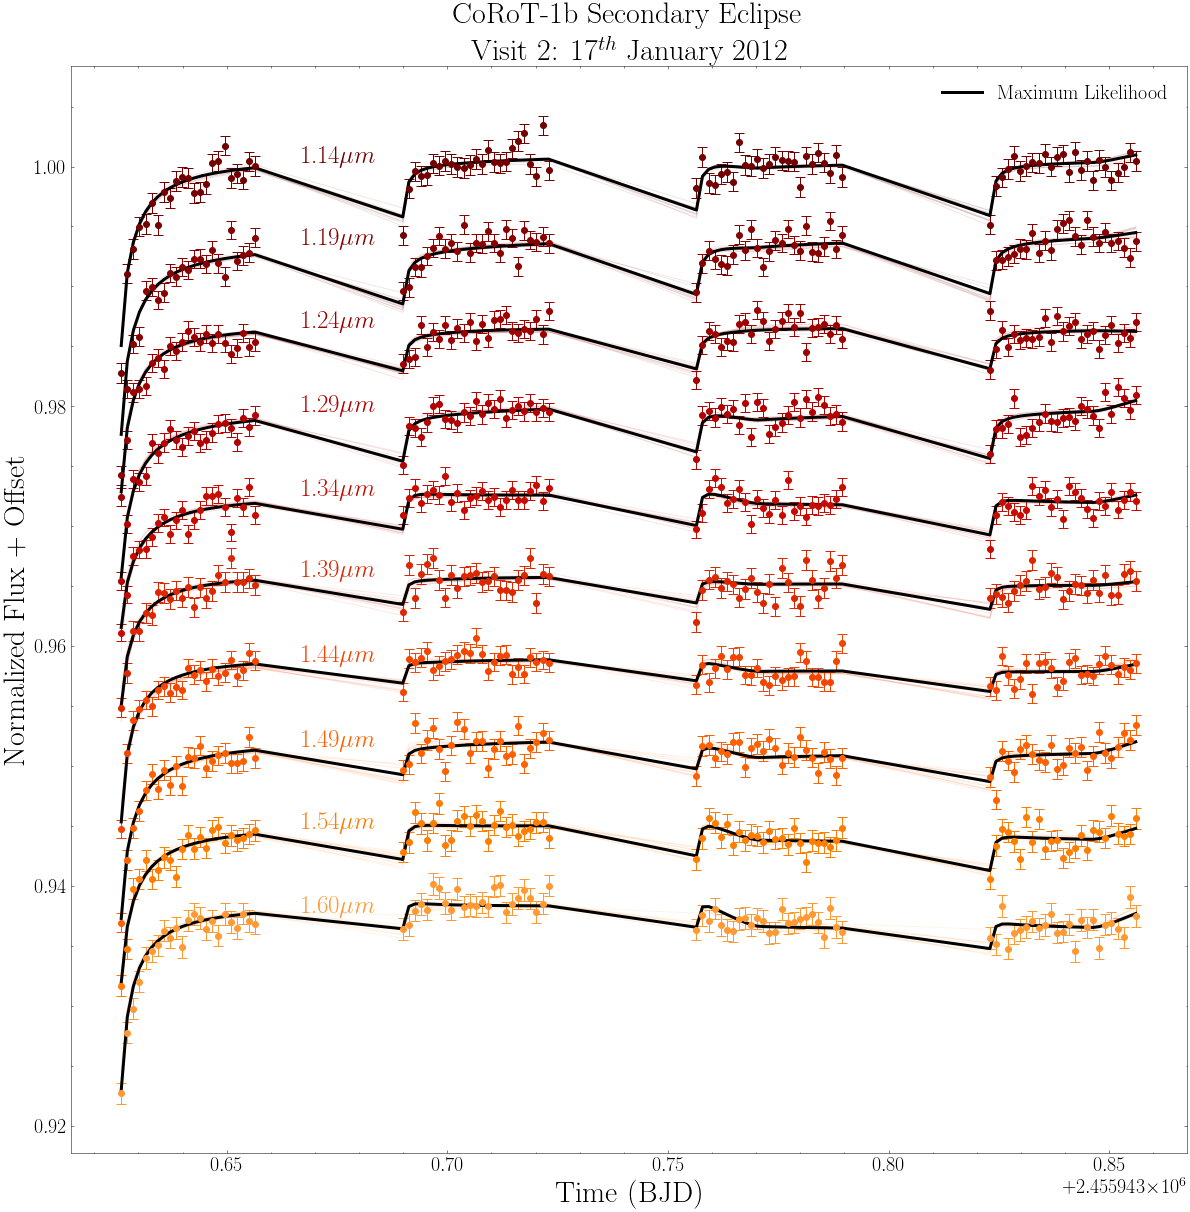

In [73]:
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit2_median_image.fits')

start = time.time()
sampler_2 = MCMC(spec_v2,eclipse_model_RECTE,20000,nbins=10,recalculate=False,showPlot=False,LCPlot=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

In [224]:
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit3_median_image.fits')

start = time.time()
sampler_3 = MCMC(spec_v3,eclipse_model_RECTE,v3_wavebin_channels,5000,nbins=10,recalculate=False,showPlot=False,lcPlot=False,co_add_check=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [108.71627627 109.2425467  117.28129676 142.46012564 124.68356321
 117.31626672 145.37429372]
burn-in: 290
thin: 54
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [137.4621865  167.18577862 177.5583225  156.52618842 158.69398547
 163.38655363 196.64348747]
burn-in: 393
thin: 68
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [108.99297022 143.9175412  172.44642752 202.57697702 143.32514982
 129.71034854 141.11351027]
burn-in: 405
thin: 54
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [114.13450065 100.82704016  94.6420481  208.25184911 115.53350522
 131.19044145 129.39935265]
burn-in: 416
thin: 47
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [ 97.59812382 101.3826926  102.85932628 226.91433042 118.58687757
 115.80832998 114.12105897]
burn-in: 453
thin: 48
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [113.09908386 119.38062042 112.38992348 152.5383

In [92]:
spec_v2.param['nightName']

'visit2'

Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [114.51392313 135.12955925 126.46809311 196.9873932  205.38321971
 202.16249257 164.55840115]
burn-in: 410
thin: 57
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [127.17721402 158.74788412 164.53641257 167.38229317 228.73388105
 162.53583123 237.58303372]
burn-in: 475
thin: 63
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [101.23975908  97.06842849  92.92244962 277.28907888 118.06868362
 131.96854279 124.75602637]
burn-in: 554
thin: 46
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [121.12264104 136.90561244 130.33215316 174.82496779 172.58095962
 140.59471411 113.72957181]
burn-in: 349
thin: 56
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [115.19625795 116.63698783 136.55099222 126.15963758 109.57526794
 134.19660302 111.36267692]
burn-in: 273
thin: 54
Solution_x took 0.0 seconds
found20000
Auto_Correlation Time: [120.29500086 113.13358374 110.17765257 132.5166

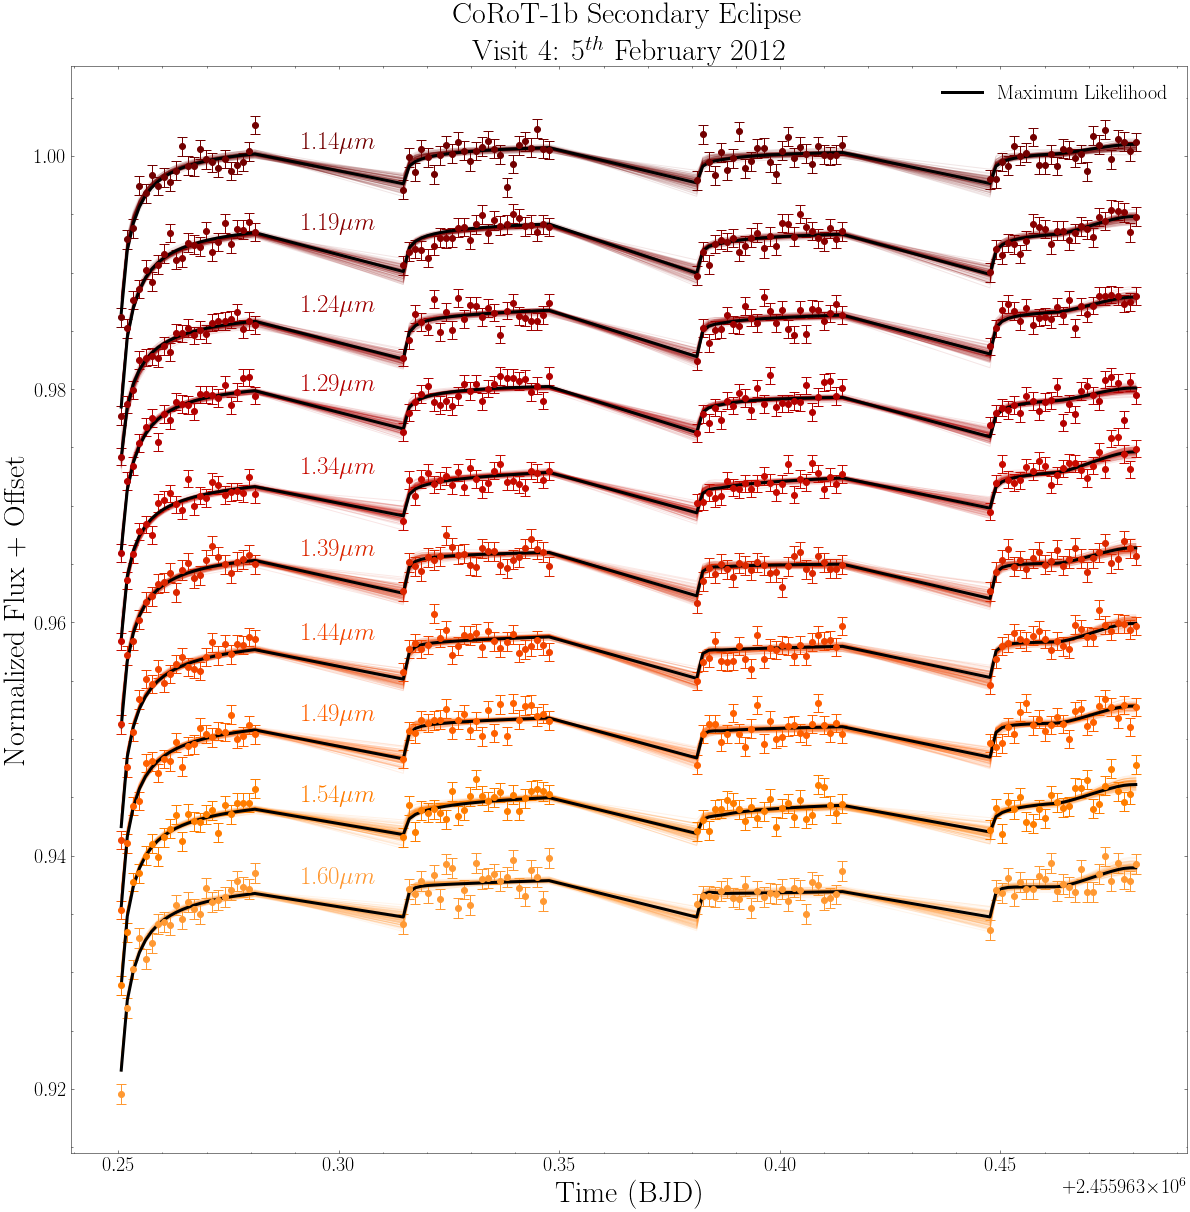

In [62]:
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = fits.getdata('Median_Images/corot1_visit4_median_image.fits')

start = time.time()
sampler_4 = MCMC(spec_v4,eclipse_model_RECTE,v4_wavebin_channels,5000,nbins=10,recalculate=False,showPlot=False,lcPlot=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

# Transit & Eclipse Spectras

In [ ]:
#wavebins values 
xc0_v1 = 75.36  
yc0_v1 = 71.57

xc0_v2 = 73.593  
yc0_v2 = 73.2098 

xc0_v3 = 75.0211
yc0_v3= 71.4784

xc0_v4=75.3891
yc0_v4=71.4633

#calibrations 
table_noise_v1=spec_v1.print_noise_wavebin(nbins=10)
table_noise_v2=spec_v2.print_noise_wavebin(nbins=10)
table_noise_v3=spec_v3.print_noise_wavebin(nbins=10)
table_noise_v4=spec_v4.print_noise_wavebin(nbins=10)

dismid_v1 = table_noise_v1['Disp Mid']
dismid_v2 = table_noise_v2['Disp Mid']
dismid_v3 = table_noise_v3['Disp Mid']
dismid_v4 = table_noise_v4['Disp Mid']

wavebins_v1 = spec_v1.wavecal(dismid_v1,waveCalMethod = 'wfc3Dispersion')
wavebins_v2 = spec_v2.wavecal(dismid_v2,waveCalMethod = 'wfc3Dispersion')
wavebins_v3 = spec_v3.wavecal(dismid_v3,waveCalMethod = 'wfc3Dispersion')
wavebins_v4 = spec_v4.wavecal(dismid_v4,waveCalMethod = 'wfc3Dispersion')

In [45]:
#Visit 2 - 16,50,84 quantiles
q50_values_2=[item[0] for item in sampler_2[0]]
lower_limit_2=[item[0] for item in sampler_2[1]]
upper_limit_2 = [item[0] for item in sampler_2[2]]

#Visit 3 - 16,50,84 quantiles
q50_values_3=[item[0] for item in sampler_3[0]]
lower_limit_3=[item[0] for item in sampler_3[1]]
upper_limit_3 = [item[0] for item in sampler_3[2]]

#Visit 4 - 16,50,84 quantiles
q50_values_4=[item[0] for item in sampler_4[0]]
lower_limit_4=[item[0] for item in sampler_4[1]]
upper_limit_4 = [item[0] for item in sampler_4[2]]

#Spitzer data Deming et al. 2011
spitzer_wavelengths=[3.6,4.5] #in microns
spitzer_eclipse_depths=[(0.415/100)*1e6, (0.482/100)*1e6] #convert percent into decimal into ppm
spitzer_eclipse_depths_errors=[(0.042/100)*1e6, (0.042/100)*1e6] #convert percent into decimal into ppm

#Average all three eclipse visits together
average_lower_limit = [(g+h+k) / 3 for g,h,k in zip(lower_limit_2,lower_limit_3,lower_limit_4)] #average the lower limit of the error bars
average_upper_limit = [(g+h+k) / 3 for g,h,k in zip(upper_limit_2,upper_limit_3,upper_limit_4)] #average the upper limits of the error bars
average_q50_values = [(g+h+k) / 3 for g,h,k in zip(q50_values_2,q50_values_3,q50_values_4)] #average the flux-to-planet ratio of all visits for all wavelengths
average_wavelengths = [(g+h+k) / 3 for g,h,k in zip(wavebins_v2,wavebins_v3,wavebins_v4)] #average the wavelengths 

#Read in Mike Line Theroretical Model Data
redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")


NameError: name 'sampler_2' is not defined

In [ ]:
#Plot The Eclipse Spectra
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15), sharex=True)
plt.style.use('science')

ax1.errorbar(wavebins_v2,q50_values_2,yerr=[lower_limit_2, upper_limit_2],label='Visit 2',fmt='--o', color='orangered')
ax1.errorbar(wavebins_v3,q50_values_3,yerr=[lower_limit_3, upper_limit_3],label='Visit 3',fmt='--o', color='gold')
ax1.errorbar(wavebins_v4,q50_values_4,yerr=[lower_limit_4, upper_limit_4],label='Visit 4',fmt='--o', color='darkolivegreen')
ax1.legend(loc="upper left")


ax2.errorbar(wavebins_v2,q50_values_2,yerr=[lower_limit_2, upper_limit_2],fmt='--o', color='grey', alpha=0.3)
ax2.errorbar(wavebins_v3,q50_values_3,yerr=[lower_limit_3, upper_limit_3],fmt='--o', color='grey', alpha=0.3)
ax2.errorbar(wavebins_v4,q50_values_4,yerr=[lower_limit_4, upper_limit_4],fmt='--o', color='grey', alpha=0.3)
ax2.errorbar(average_wavelengths,average_q50_values,yerr=[average_lower_limit,average_upper_limit],label='Average Spectra',fmt='--o', color="darkred")
ax2.legend(loc="upper left")

ax1.set_title("CoRoT-1b Eclipse Spectra", fontsize = 30)
ax1.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=20)
ax2.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=20)
ax2.set_xlabel("Wavelength ($\mu m$)", fontsize=20)
ax1.tick_params(axis = 'both',labelsize = 20)
ax2.tick_params(axis = 'both',labelsize = 20)



fig.savefig('saved_figures/CoRoT-1b_MCMC_Eclipse_Spectra.jpeg', bbox_inches='tight')


In [ ]:
# Plot The Eclipse Spectra
fig, ax2 = plt.subplots(figsize=(960/72,360/72))
plt.style.use('science')

ax2.errorbar(average_wavelengths,average_q50_values,yerr=[average_lower_limit,average_upper_limit],label='Average Spectra',fmt='o', color="darkred")
ax2.errorbar(spitzer_wavelengths,spitzer_eclipse_depths,yerr=spitzer_eclipse_depths_errors,label='Spitzer Data',fmt='o', color='darkgreen')
ax2.plot(redist_266['#Wavelength[um]'],redist_266['Fp/Fstar[ppm]'],label="CoRoT-1b Redist 2.66",color='steelblue')
ax2.plot(redist_2['#Wavelength[um]'],redist_2['Fp/Fstar[ppm]'],label='CoRoT-1b Redist 2.0',color='darkviolet')
ax2.plot(redist_1['#Wavelength[um]'],redist_1['Fp/Fstar[ppm]'],label='CoRoT-1b Redist 1.0',color='red')
ax2.legend()

ax2.set_xlim(0.8,5)
ax2.set_ylim(0,6000)

ax2.set_title("CoRoT-1b Eclipse Spectra vs. Theoretical Models", fontsize = 20)
ax2.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=15)
ax2.set_xlabel("Wavelength ($\mu m$)", fontsize=15)
ax2.tick_params(axis = 'both',labelsize = 15)


fig.savefig('saved_figures/CoRoT-1b_MCMC_Theoretical_Eclipse_Spectra.jpeg')

In [ ]:
#Mike Line Data - TP profile
TP_redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")
TP_redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")
TP_redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")


fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, label="1")
#ax2=fig.add_subplot(111, label="2", frame_on=False)
#ax2.xaxis.tick_top()
#ax2.set_yticks([])

ax.set_yscale('log')
#ax2.set_xscale('log')

ax.plot(TP_redist_266['T[K]'],TP_redist_266['P[bar]'],color='steelblue', label='CoRoT-1b Redist 2.66')
ax.plot(TP_redist_2['T[K]'],TP_redist_2['P[bar]'], color='darkviolet', label='CoRoT-1b Redist 2.0')
ax.plot(TP_redist_1['T[K]'],TP_redist_1['P[bar]'], color='red', label='CoRoT-1b Redist 1.0')

#ax2.plot(TP_redist_266['TiO'],TP_redist_266['P[bar]'],'--o')



ax.set_ylim(10**2, 10**-6)
#ax2.set_xlim(10**-12, 10**0)
ax.set_xlim(0,5000)

ax.legend()
ax.set_title("Theoretical Temperature-Pressure Profile CoRoT-1b", fontsize=20)
ax.set_ylabel("Pressure[Bar]", fontsize=15)
ax.set_xlabel("Temperature [K]", fontsize=15)
ax.tick_params(axis = 'both',labelsize = 15)


fig.savefig('saved_figures/CoRoT-1b_MCMC_Theoretical_TP_Profile.jpeg')

## BlackBody

In [ ]:
def blackbody_lam(x, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    x = 1e-6 *x # convert from microns to metres
    return 2*h*c**2 / (x**5 * (np.exp(h*c / (x*k*T)) - 1)) #returns intensity(or flux)


In [ ]:
def Planet_to_Star_Flux_Ratio(x,T_planet,T_star=5907.6665,R_planet=rp, R_star=Rstar):
    #x in microns, temperature in Kelvins,Radii in same units 
    flux_planet = blackbody_lam(x,T_planet)*(np.pi)*(R_planet)**2
    flux_star = blackbody_lam(x,T_star)*(np.pi)*(R_star)**2
    planet_to_star_flux_ratio = ((flux_planet/flux_star).si.value)*1e6 #ppm

    return planet_to_star_flux_ratio

In [ ]:
real_planet_to_star_flux_ratio=average_q50_values
optimized_temp, error_optimized_temp = curve_fit(Planet_to_Star_Flux_Ratio, np.array(average_wavelengths), real_planet_to_star_flux_ratio,p0=1000)#,sigma=median_error)

planet_to_star_flux_ratio = Planet_to_Star_Flux_Ratio(np.array(average_wavelengths),optimized_temp)

#plotting
fig, ax = plt.subplots(figsize=(10,10)) 

#real data
ax.errorbar(np.array(average_wavelengths),average_q50_values,yerr=[average_lower_limit,average_upper_limit],label='Average Spectra', fmt='--o')

#blackbody modeled data
ax.plot(np.array(average_wavelengths),planet_to_star_flux_ratio,'--o',label='Optimized Blackbody Model')

#ax.set_title('Eclipse Spectrum with RECTE Correction')
ax.legend(loc ='upper left') 
ax.set_xlabel('Wavelength (microns)')
ax.set_ylabel('Planet-to-Star Flux Ratio (ppm)')
ax.set_title('Average Eclipse Spectrum BlackBody Model')
#fig.savefig('saved_figures/new_Blackbody_model.pdf')


In [ ]:
optimized_temp